In [1]:
#UTKARSH SABOO
#RA2011003011248
#Question 3 - CT3 Lab
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

In [3]:
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

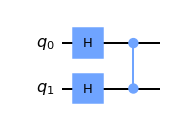

In [4]:
n = 2
grover_circuit = QuantumCircuit(n)

grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

grover_circuit.cz(0,1)
grover_circuit.draw()

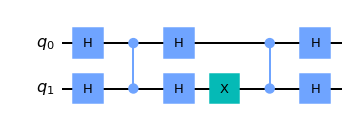

In [5]:
grover_circuit.h([0,1])
grover_circuit.x([1])
grover_circuit.cz(1,0)
grover_circuit.h([0,1])
grover_circuit.draw()

In [6]:
sim = Aer.get_backend('aer_simulator')
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

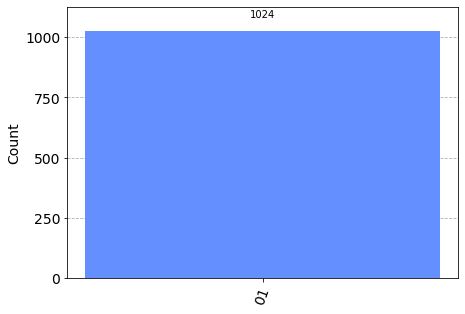

In [7]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [8]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2022-11-25 16:34:36,829: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_lima


In [9]:
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


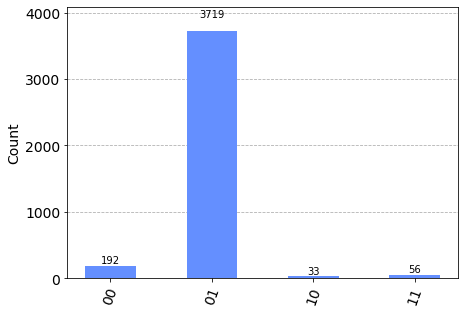

In [10]:
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)